## Import Nessecary Modules

In [1]:
from matplotlib import pyplot as plt
from matplotlib import *
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

## Read ask and bid prices

In [2]:
# read in ask price
ASK = pd.read_csv('GAS.CMDUSD_Candlestick_5_M_ASK_30.11.2023-30.11.2024.csv')
# read in bid price
BID = pd.read_csv('GAS.CMDUSD_Candlestick_5_M_BID_30.11.2023-30.11.2024.csv')
# print ask data
ASK

,Local time,Open,High,Low,Close,Volume
0,30.11.2023 00:00:00.000 GMT-0000,2.7979,2.7983,2.7968,2.7983,0.0004
1,30.11.2023 00:05:00.000 GMT-0000,2.7978,2.7993,2.7978,2.7989,0.0004
2,30.11.2023 00:10:00.000 GMT-0000,2.7989,2.7989,2.7989,2.7989,0.0000
3,30.11.2023 00:15:00.000 GMT-0000,2.7978,2.8008,2.7978,2.8001,0.0006
4,30.11.2023 00:20:00.000 GMT-0000,2.8008,2.8020,2.8008,2.8010,0.0010
...,...,...,...,...,...,...
105691,30.11.2024 23:35:00.000 GMT-0000,3.3673,3.3673,3.3673,3.3673,0.0000
105692,30.11.2024 23:40:00.000 GMT-0000,3.3673,3.3673,3.3673,3.3673,0.0000
105693,30.11.2024 23:45:00.000 GMT-0000,3.3673,3.3673,3.3673,3.3673,0.0000
105694,30.11.2024 23:50:00.000 GMT-0000,3.3673,3.3673,3.3673,3.3673,0.0000


## Combine the two dataframes

In [3]:
# combine ask and bid price
data = data = BID.merge(ASK, left_on='Local time', right_on='Local time', how='outer')
# print 3 rows of the data
data.head(3)

,Local time,Open_x,High_x,Low_x,Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Volume_y
0,30.11.2023 00:00:00.000 GMT-0000,2.7871,2.7879,2.7867,2.7879,0.0004,2.7979,2.7983,2.7968,2.7983,0.0004
1,30.11.2023 00:05:00.000 GMT-0000,2.7871,2.7897,2.7871,2.7880,0.0004,2.7978,2.7993,2.7978,2.7989,0.0004
2,30.11.2023 00:10:00.000 GMT-0000,2.7880,2.7880,2.7880,2.7880,0.0000,2.7989,2.7989,2.7989,2.7989,0.0000


## Drop any data that has missing values

In [4]:
# drop any data with missing values
data = data.dropna()

## Rename Columns

In [5]:
# rename the columns in data
data.columns = ['Local time', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']
# print 3 rows of data
data.head(3)

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,30.11.2023 00:00:00.000 GMT-0000,2.7871,2.7879,2.7867,2.7879,0.0004,2.7979,2.7983,2.7968,2.7983,0.0004
1,30.11.2023 00:05:00.000 GMT-0000,2.7871,2.7897,2.7871,2.7880,0.0004,2.7978,2.7993,2.7978,2.7989,0.0004
2,30.11.2023 00:10:00.000 GMT-0000,2.7880,2.7880,2.7880,2.7880,0.0000,2.7989,2.7989,2.7989,2.7989,0.0000


## Create Deltas

In [6]:
# create volume delta
data["Volume_Delta"] = data["Volume_Ask"] - data["Volume_Bid"]
# create volume delta absolute value
data["Volume_Delta_abs"] = (data["Volume_Ask"] - data["Volume_Bid"]).abs()
# create open price delta
data["Open_Delta"] = data["Open_Ask"]  - data["Open_Bid"]
# create high price delta
data["High_Delta"] = data["High_Ask"]  - data["High_Bid"]
# create low price delta
data["Low_Delta"]  = data["Low_Ask"]   - data["Low_Bid"]
# create cole price delta
data["Close_Delta"]= data["Close_Ask"] - data["Close_Bid"]

## Convert Local time to datetime object

In [7]:
# import datetime library
import datetime
# convert localtime to datetime object
data['Local time'] = pd.to_datetime(data['Local time'], format='%d.%m.%Y %H:%M:%S.%f GMT%z', errors='coerce')

In [8]:
# print the columns info with datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105696 entries, 0 to 105695
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Local time        105696 non-null  object 
 1   Open_Bid          105696 non-null  float64
 2   High_Bid          105696 non-null  float64
 3   Low_Bid           105696 non-null  float64
 4   Close_Bid         105696 non-null  float64
 5   Volume_Bid        105696 non-null  float64
 6   Open_Ask          105696 non-null  float64
 7   High_Ask          105696 non-null  float64
 8   Low_Ask           105696 non-null  float64
 9   Close_Ask         105696 non-null  float64
 10  Volume_Ask        105696 non-null  float64
 11  Volume_Delta      105696 non-null  float64
 12  Volume_Delta_abs  105696 non-null  float64
 13  Open_Delta        105696 non-null  float64
 14  High_Delta        105696 non-null  float64
 15  Low_Delta         105696 non-null  float64
 16  Close_Delta       10

## Drop Ask Prices

In [9]:
# drop the ask prices
data=data.drop(['Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask'], axis=1)

## Display Candlestick Data

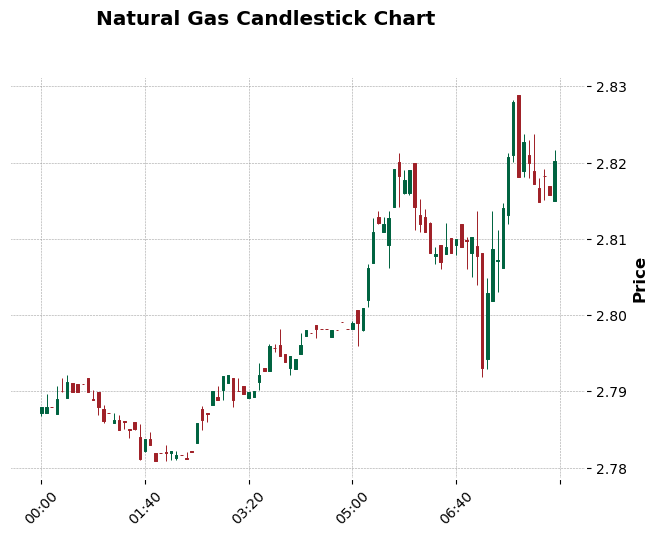

In [10]:
# import module to display candlestick data
import mplfinance as mpf
# create a new chart
data_chart = data.set_index('Local time', inplace=False)
# set index to local time column
data_chart.index = pd.to_datetime(data_chart.index, utc=True)
# drop the columns
data_chart = data_chart.drop(['Volume_Ask', 'Volume_Delta', 'Volume_Delta_abs', 
                        'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta'],axis=1)
# add new columns to the chart
data_chart.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
# display the candlestick chart
mpf.plot(data_chart.iloc[0:100], type='candle', style='charles', title='Natural Gas Candlestick Chart', volume=False)

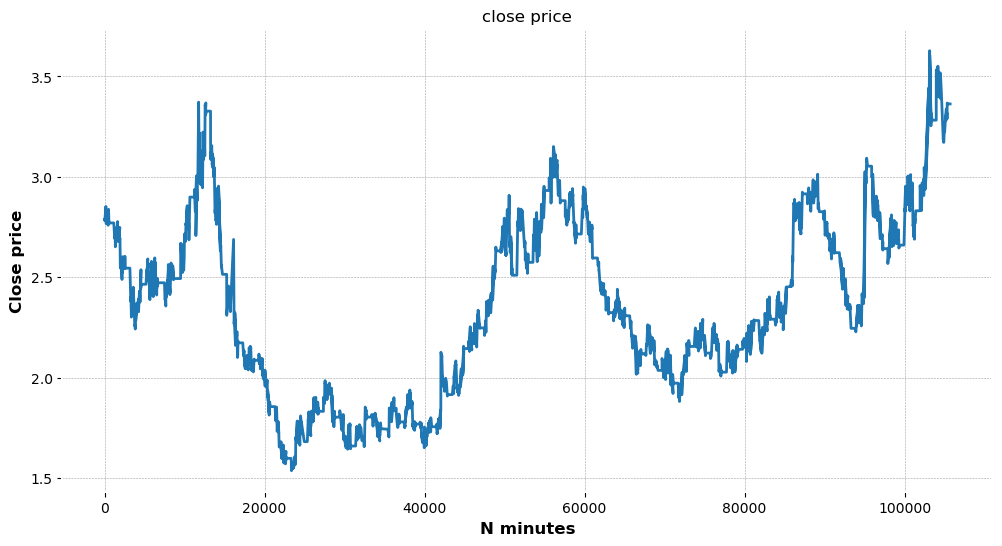

In [11]:
# create figure for close price
plt.figure(figsize=(12,6))
# plot close price data
plt.plot(data['Close_Bid'])
# set title for figure
plt.title('close price')
# set xlabel title
plt.xlabel('N minutes')
# set ylabel title
plt.ylabel('Close price')
# show the figure
plt.show()

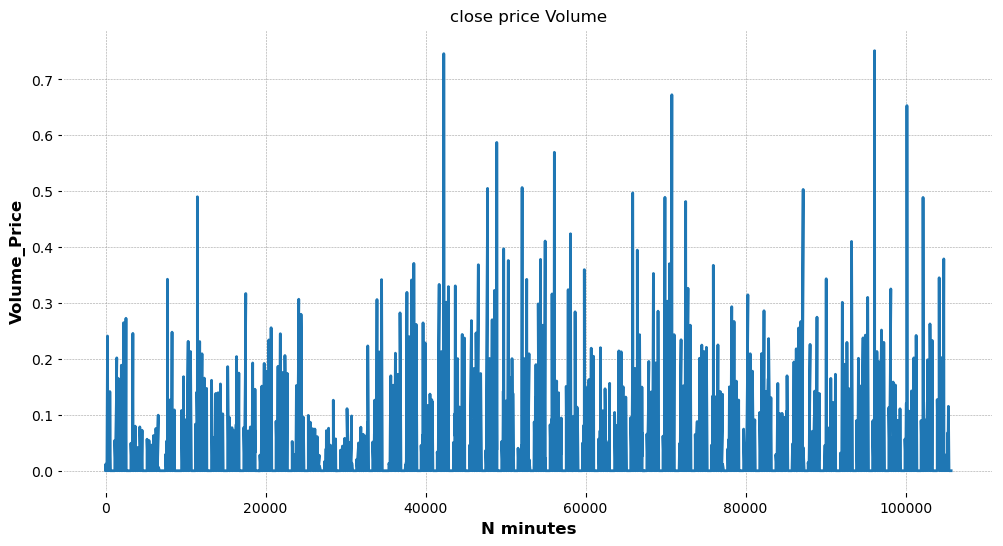

In [12]:
# make figure for volume price
plt.figure(figsize=(12,6))
# plot the volume price
plt.plot(data['Volume_Bid'])
# set title for figure
plt.title('close price Volume')
# set xlabel title
plt.xlabel('N minutes')
# set ylabel title
plt.ylabel('Volume_Price')
# show the plot
plt.show()

In [13]:
# convert local time to a datetime type
data['Local time'] = pd.to_datetime(data['Local time'], format='%d.%m.%Y %H:%M:%S.%f GMT%z', errors='coerce')
# drop weekend data as the market is closed
data = data[~data['Local time'].dt.dayofweek.isin([5, 6])]
# make time market closes
market_close_time = data['Local time'].dt.normalize() + pd.Timedelta(hours=5, minutes=0, seconds=0)
# make time market opens
market_open_time = data['Local time'].dt.normalize() + pd.Timedelta(hours=4, minutes=0, seconds=0)
# drop data outside the open hours of the market
data = data[(data['Local time'] < market_close_time) | (data['Local time'] > market_open_time)]

In [14]:
# generate another dataframe without the localtime
data2 = data.drop(['Local time'], axis=1)

In [15]:
# show the length of the data
data_length = len(data)
data_length

32256

In [16]:
# generate the size of the training data
train_size = int(round(data_length*0.9, -3))
train_size

29000

In [17]:
# create y parameters for the second dataframe
data2['Y_High_Bid'] = data2['High_Bid']
data2['Y_Low_Ask'] = data2['Low_Bid'] + data2['Low_Delta']

In [18]:
# generate training data and print the shape
train = data2.iloc[:train_size]
train.shape

(29000, 14)

In [19]:
# generate max price variable
max_price = (train['High_Bid'] + train['High_Delta']).max()
max_price

3.393

In [20]:
# generate min price variable
min_price = train['Low_Bid'].min()
min_price

1.5339

In [21]:
# generate max volume variable
max_volume = max(max(train['Volume_Bid']), max(train['Volume_Ask']))
max_volume

0.7514000000000001

In [22]:
# create max delta and round to 3 decimal places
max_Delta = max(max(train['Open_Delta']), max(train['High_Delta']), max(train['Low_Delta']), max(train['Close_Delta']))
max_Delta = round(max_Delta, 3)
max_Delta

0.011

In [23]:
# create min delta and round to 3 decimal places
min_Delta = min(min(train['Open_Delta']), min(train['High_Delta']), min(train['Low_Delta']), min(train['Close_Delta']))
min_Delta = round(min_Delta, 3)
min_Delta

0.0

In [24]:
# generate min volume delta
min_volume_Delta = train['Volume_Delta'].min()
min_volume_Delta

-0.31400000000000006

In [25]:
# generate max volume delta
max_volume_Delta = train['Volume_Delta'].max()
max_volume_Delta

0.45959999999999995

In [26]:
# generate max volume delta in absolute value form
max_volume_Delta_abs = train['Volume_Delta_abs'].max()
max_volume_Delta_abs

0.45959999999999995

In [27]:
# show min volume delta in absolute value form
min_volume_Delta_abs = train['Volume_Delta_abs'].min()
min_volume_Delta_abs

0.0

In [28]:
# create open bid for second dataset in normalised form
data2['Open_Bid'] = ( data2['Open_Bid'] - min_price ) / (max_price-min_price)
# create high bid for second dataset in normalized form
data2['High_Bid']  = ( data2['High_Bid']  - min_price ) / (max_price-min_price)
# create low bid in data2 in normalized form
data2['Low_Bid']   = ( data2['Low_Bid']   - min_price ) / (max_price-min_price)
# create close bid in normalized form
data2['Close_Bid'] = ( data2['Close_Bid'] - min_price ) / (max_price-min_price)
# create y parameters in normalized form
data2['Y_High_Bid'] = ( data2['Y_High_Bid'] - min_price ) / (max_price-min_price)
data2['Y_Low_Ask']  = ( data2['Y_Low_Ask']  - min_price ) / (max_price-min_price)

In [29]:
# normalize volume ask and bid
data2['Volume_Ask']  = data2['Volume_Ask'] / max_volume
data2['Volume_Bid']  = data2['Volume_Bid'] / max_volume

In [30]:
# normalize volume delta
data2['Volume_Delta'] = ( data2['Volume_Delta'] - min_volume_Delta ) / (max_volume_Delta-min_volume_Delta)

In [31]:
# normalize volume delta absolut value
data2['Volume_Delta_abs']  = data2['Volume_Delta_abs'] / max_volume_Delta_abs

In [32]:
# normalize the deltas
data2['Open_Delta']  = ( max_Delta - data2['Open_Delta'] )  / (max_Delta-min_Delta)
data2['High_Delta']  = ( max_Delta - data2['High_Delta'] )  / (max_Delta-min_Delta)
data2['Low_Delta']   = ( max_Delta - data2['Low_Delta'] )   / (max_Delta-min_Delta)
data2['Close_Delta'] = ( max_Delta - data2['Close_Delta'] ) / (max_Delta-min_Delta)

In [33]:
# generate data ax dataframe
data_ax = data2.drop(['Y_High_Bid', 'Y_Low_Ask'], axis=1)

In [34]:
# generate data ay dataframe
data_ay = data2[['Y_High_Bid', 'Y_Low_Ask']]

In [35]:
# shift the data
data_ay = data_ay.shift(-1)

In [36]:
# create the sliding window
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=5)

# run the sliding window across data ay
data_ay['Y_High_Bid_5'] = data_ay['Y_High_Bid'].rolling(window=indexer).max()
data_ay['Y_Low_Ask_5']  = data_ay['Y_Low_Ask'].rolling(window=indexer).min()

In [37]:
# drop the y data from data ay
data_ay = data_ay.drop(['Y_High_Bid', 'Y_Low_Ask'], axis=1)

In [38]:
# print shape of ay and ax
print(data_ay.shape)
print(data_ax.shape)

(32256, 2)
(32256, 12)


In [39]:
# drop the last 5 mind from the dataset
data_ay.drop(data_ay.tail(5).index,inplace=True)
data_ax.drop(data_ay.tail(5).index,inplace=True)

In [40]:
# convert data ax to numpy array
data_a = np.array(data_ax) 

# loop and print the numpy array
with np.printoptions(precision=4):
    print("data_a:")
    print(data_a[:2,:])  
    print('\n')
    print(data_a[-2:,:]) 

print("numpy size: = ", data_a.shape)
print("type: ", data_a.dtype) 

data_a:
[[6.7409e-01 6.7452e-01 6.7387e-01 6.7452e-01 5.3234e-04 5.3234e-04
  4.0589e-01 0.0000e+00 1.8182e-02 5.4545e-02 8.1818e-02 5.4545e-02]
 [6.7409e-01 6.7549e-01 6.7409e-01 6.7457e-01 5.3234e-04 5.3234e-04
  4.0589e-01 0.0000e+00 2.7273e-02 1.2727e-01 2.7273e-02 9.0909e-03]]


[[0.9838 0.9838 0.9838 0.9838 0.     0.     0.4059 0.     0.6    0.6
  0.6    0.6   ]
 [0.9838 0.9838 0.9838 0.9838 0.     0.     0.4059 0.     0.6    0.6
  0.6    0.6   ]]
numpy size: =  (32251, 12)
type:  float64


In [41]:
# Create outputs Numpy

data_y = np.array(data_ay) 

print("data_a:")
print(data_y[:3,:])  
print('\n')
print(data_y[-3:,:]) 

print("numpy size: = ", data_y.shape)
print("type: ", data_y.dtype) 

data_a:
[[0.67677909 0.67984509]
 [0.67677909 0.67984509]
 [0.67677909 0.67984509]]


[[0.98380937 0.98617611]
 [0.98380937 0.98617611]
 [0.98380937 0.98617611]]
numpy size: =  (32251, 2)
type:  float64


In [42]:
# show the size of the tensor to be generated
from tqdm import tqdm
n_small = 30000
N=50
L=n_small-N
t=data_a.shape[1]
print('Size of a three dimensional inputs tensor: ', L,N,t)

Size of a three dimensional inputs tensor:  29950 50 12


In [43]:
# create the input and output tensors
data_b = np.zeros( (L, N, t), dtype= 'float32' ) 
Y = np.zeros((L, 2), dtype= 'float32') 

In [44]:
# create the tensors
print('L = n_small - N - 5 = ', n_small-N-5, L)
for k in tqdm(range(L)):
    data_b[k, :, :] = data_a[k:k+N, :]   
                                          
    Y[k,0] = data_y[k+N-1,0]   
    Y[k,1] = data_y[k+N-1,1]   

print(k)
    
print('data_b:', '\n', data_b)
print("Numpy size:        ", data_b.shape, '\n')

print( Y[:5,:])
print( Y[-10:,:])
print(      "Numpy size:         ", Y.shape)

L = n_small - N - 5 =  29945 29950


100%|██████████| 29950/29950 [00:00<00:00, 210960.89it/s]

29949
data_b: 
 [[[ 6.7408961e-01  6.7451996e-01  6.7387444e-01 ...  5.4545455e-02
    8.1818178e-02  5.4545455e-02]
  [ 6.7408961e-01  6.7548811e-01  6.7408961e-01 ...  1.2727273e-01
    2.7272727e-02  9.0909088e-03]
  [ 6.7457372e-01  6.7457372e-01  6.7457372e-01 ...  9.0909088e-03
    9.0909088e-03  9.0909088e-03]
  ...
  [ 6.7828518e-01  6.7828518e-01  6.7774731e-01 ... -9.0909088e-03
    9.0909088e-03  9.0909088e-03]
  [ 6.7726320e-01  6.7817760e-01  6.7677909e-01 ...  7.2727270e-02
    9.0909088e-03  1.2727273e-01]
  [ 6.7720938e-01  6.7790866e-01  6.7720938e-01 ...  9.0909088e-03
    5.4545455e-02  9.0909088e-03]]

 [[ 6.7408961e-01  6.7548811e-01  6.7408961e-01 ...  1.2727273e-01
    2.7272727e-02  9.0909088e-03]
  [ 6.7457372e-01  6.7457372e-01  6.7457372e-01 ...  9.0909088e-03
    9.0909088e-03  9.0909088e-03]
  [ 6.7403585e-01  6.7602605e-01  6.7403585e-01 ...  8.1818178e-02
    1.8181818e-02 -9.0909088e-03]
  ...
  [ 6.7726320e-01  6.7817760e-01  6.7677909e-01 ...  7.272727

In [45]:
# Control of the correctness of filling the array Y 
# (should show MAX of the normalised prices High_Bid and Low_Ask - during 5 next minutes(step) ahead)
import random

pp = random.randint(50, L)
print('random int = ', pp)

print('data_b:', '\t\t','Y:')
print('Y_High_Bid ','\t\t','Y_High_Bid')

for i in range(15):
    print(data_b[pp+i,N-1,1], '\t\t', Y[pp+i,0])

random int =  28968
data_b: 		 Y:
Y_High_Bid  		 Y_High_Bid
0.70152223 		 0.7004464
0.7004464 		 0.6924318
0.6921629 		 0.6924318
0.69237804 		 0.6924318
0.6924318 		 0.68861276
0.68861276 		 0.6864074
0.6864074 		 0.6853854
0.6853854 		 0.68355656
0.68318003 		 0.68355656
0.68264216 		 0.68355656
0.6810284 		 0.68355656
0.68355656 		 0.68167394
0.68167394 		 0.67952234
0.6776397 		 0.67952234
0.67952234 		 0.676295


In [46]:
# clear the memory
data = []
data_ax = []
data_ay = []
data_a = []
data_y = []

In [47]:
# split data into train and test
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

X_train, X_test, y_train, y_test = train_test_split(data_b, Y, test_size=0.1, shuffle=False, stratify=None, random_state=101)

print(data_b.shape)

(29950, 50, 12)


In [48]:
# create lstm model
model = keras.Sequential([
    keras.layers.LSTM(100, activation='relu', input_shape=(50, 12)),
    keras.layers.Dense(2)
])

C:\Users\fredd\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
# print the model summary
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        45,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,402 (177.35 KB)

 Trainable params: 45,402 (177.35 KB)

 Non-trainable params: 0 (0.00 B)

None


In [50]:
# compile the model with the relveant metrics
model.compile(optimizer='adam', loss='mse', metrics=['mae', tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score()])

In [51]:
# setup the relevant callbacks
es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
mc = ModelCheckpoint('best_model.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [52]:
# train lstm model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1, shuffle=True, verbose=1, callbacks=[es, mc])

Epoch 1/20
758/759 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0032 - mae: 0.0204 - r2_score: 0.9451 - root_mean_squared_error: 0.0459
Epoch 1: val_loss improved from inf to 0.00094, saving model to best_model.keras
759/759 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - loss: 0.0032 - mae: 0.0204 - r2_score: 0.9453 - root_mean_squared_error: 0.0459 - val_loss: 9.4417e-04 - val_mae: 0.0074 - val_r2_score: 0.9859 - val_root_mean_squared_error: 0.0307
Epoch 2/20
758/759 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 7.8256e-05 - mae: 0.0057 - r2_score: 0.9987 - root_mean_squared_error: 0.0088
Epoch 2: val_loss improved from 0.00094 to 0.00086, saving model to best_model.keras
759/759 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - loss: 7.8248e-05 - mae: 0.0057 - r2_score: 0.9987 - root_mean_squared_error: 0.0088 - val_loss: 8.6300e-04 - val_mae: 0.0059 - val_r2_score: 0.9871 - val_root_mean_squared_error: 0.0294
Epoch 3/20
758/759 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 6.3410e-05 - mae: 0.0052 - r2_score: 0.99

759/759 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 4.9259e-05 - mae: 0.0040 - r2_score: 0.9992 - root_mean_squared_error: 0.0069
Epoch 17: val_loss improved from 0.00057 to 0.00055, saving model to best_model.keras
759/759 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - loss: 4.9250e-05 - mae: 0.0040 - r2_score: 0.9992 - root_mean_squared_error: 0.0069 - val_loss: 5.5429e-04 - val_mae: 0.0042 - val_r2_score: 0.9917 - val_root_mean_squared_error: 0.0235
Epoch 18/20
758/759 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 4.8621e-05 - mae: 0.0040 - r2_score: 0.9992 - root_mean_squared_error: 0.0070
Epoch 18: val_loss did not improve from 0.00055
759/759 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - loss: 4.8600e-05 - mae: 0.0040 - r2_score: 0.9992 - root_mean_squared_error: 0.0069 - val_loss: 5.5956e-04 - val_mae: 0.0048 - val_r2_score: 0.9916 - val_root_mean_squared_error: 0.0237
Epoch 19/20
758/759 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 3.9747e-05 - mae: 0.0037 - r2_score: 0.9993 - root_mean_squared_error: 0.0

In [53]:
# get the saved best model to evaluate
LSTM_saved_best_model = keras.models.load_model('best_model.keras')

In [54]:
# evaluate the saved best model and store the results
scores = LSTM_saved_best_model.evaluate(X_test, y_test, verbose=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 3.9251e-05 - mae: 0.0044 - r2_score: 0.8598 - root_mean_squared_error: 0.0062


In [55]:
# print the stored metrics
print("Mean squared error (mse): %.9f " % (scores[0]))
print("Mean absolute error (mae): %.9f " % (scores[1]))
print("R2 Score: %.9f " % (scores[2]))
print("root means squared error (rmse): %.9f" % (scores[3]))

Mean squared error (mse): 0.000045475 
Mean absolute error (mae): 0.004779289 
R2 Score: 0.006743526 
root means squared error (rmse): 0.987205386


In [56]:
# generate predicitons
pred = model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


In [57]:
# store metrics in dataframe for later use
LSTM_METRICS = {
    "mse" : (scores[0]*1),
    "mae" : (scores[1]*1),
    "r2" : (scores[2]*1),
    "rmse" : (scores[3]*1)
}

overall_results = pd.DataFrame([LSTM_METRICS])
overall_results.index = ['lstm']
overall_results.index.name = "Model Name"
overall_results

,mse,mae,r2,rmse
Model Name,,,,
lstm,0.000045,0.004779,0.006744,0.987205


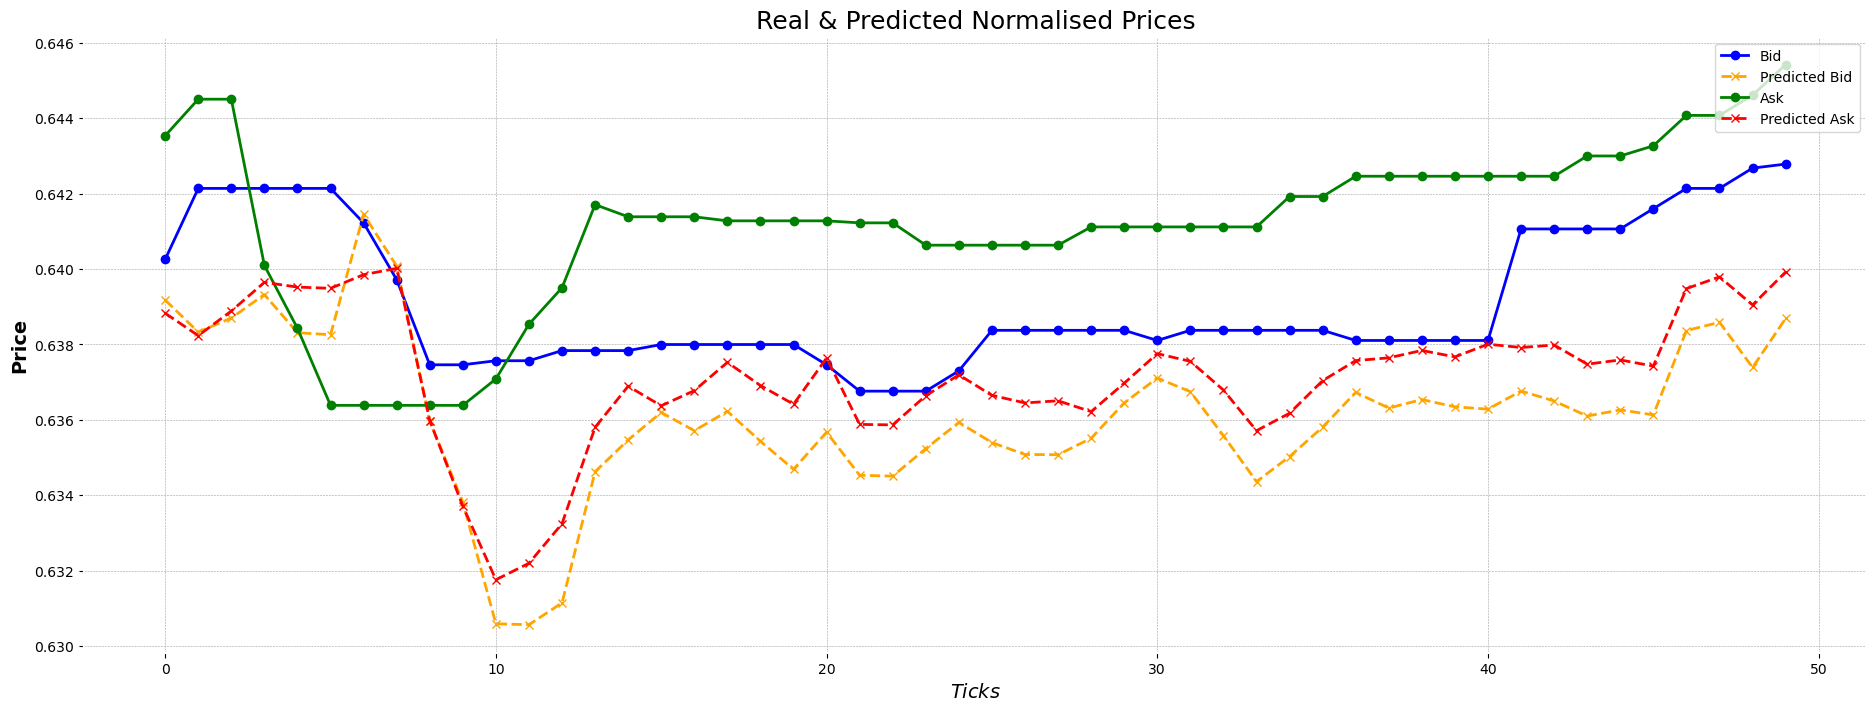

In [58]:
# print the ask and bid prices alsongside the predicitons
plt.ion()
fig = plt.figure(figsize=(23,8))
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test[350:400, 0], label='Bid', marker='o', markersize=6, linestyle='-', color='blue')
line2, = ax1.plot(pred[350:400, 0], label='Predicted Bid', marker='x', markersize=6, linestyle='--', color='orange')
line3, = ax1.plot(y_test[350:400, 1], label='Ask', marker='o', markersize=6, linestyle='-', color='green')
line4, = ax1.plot(pred[350:400, 1], label='Predicted Ask', marker='x', markersize=6, linestyle='--', color='red')

plt.title('Real & Predicted Normalised Prices', size=18)
plt.ylabel('Price', size=14)
plt.xlabel('$Ticks$', size=14)
plt.legend(loc='upper right')
plt.show()

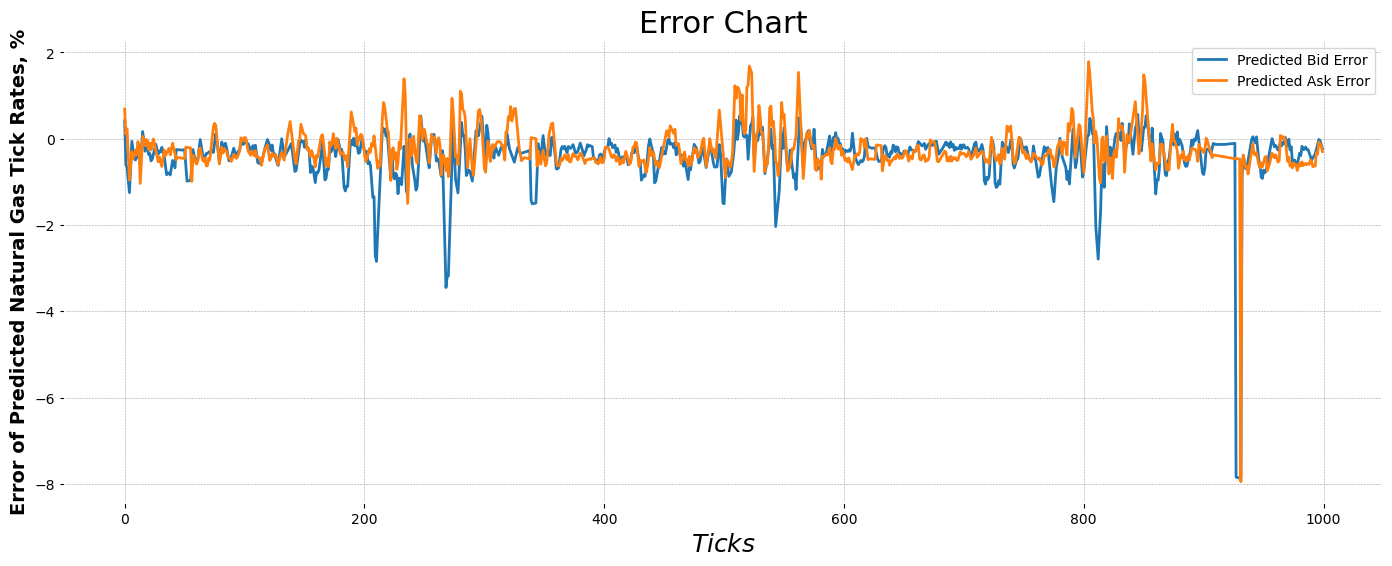

In [59]:
# print the error graph
N1=0     # start
N2=1000   # end

plt.ion()
fig = plt.figure(figsize=(17,6))
ax1 = fig.add_subplot(111)

a = (pred[N1:N2,0]-y_test[N1:N2,0])*100
b = (pred[N1:N2,1]-y_test[N1:N2,1])*100

line1, = ax1.plot(a, label='Predicted Bid Error')
line2, = ax1.plot(b, label='Predicted Ask Error')

plt.title('Error Chart', size=22)
plt.ylabel('Error of Predicted Natural Gas Tick Rates, %', size=14)
plt.xlabel('$Ticks$', size=18)
plt.legend(loc='upper right') 

plt.show()

## CNN Architecture

In [60]:
# import the tensorflow libraries
import random
import tensorflow as tf
from tensorflow import keras

# create CNN model
model = keras.Sequential([
    keras.layers.Conv1D(50, 9, padding='same', input_shape=(50, 12), activation=tf.nn.relu, kernel_initializer='normal'),
    keras.layers.MaxPooling1D(7),
    keras.layers.Conv1D(100, 7, padding='same', activation=tf.nn.relu, kernel_initializer='normal'),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(25, activation=tf.nn.relu, kernel_initializer='normal'),
    keras.layers.Dense(2)
])

# print the CNN model summary
print(model.summary())

C:\Users\fredd\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 50, 50)         │         5,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 7, 100)         │        35,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 100)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         2,525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,127 (168.46 KB)

 Trainable params: 43,127 (168.46 KB)

 Non-trainable params: 0 (0.00 B)

None


In [61]:
# compile the model with relevant metrics
model.compile(optimizer='adam', loss='mse', metrics=["mae",  tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score()])

In [62]:
# train model with relevant callbacks
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2, verbose=1, callbacks=[es,mc])

Epoch 1/20
672/674 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0078 - mae: 0.0352 - r2_score: 0.8634 - root_mean_squared_error: 0.0728
Epoch 1: val_loss did not improve from 0.00055
674/674 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0077 - mae: 0.0351 - r2_score: 0.8639 - root_mean_squared_error: 0.0727 - val_loss: 9.7564e-04 - val_mae: 0.0108 - val_r2_score: 0.9869 - val_root_mean_squared_error: 0.0312
Epoch 2/20
674/674 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7575e-04 - mae: 0.0091 - r2_score: 0.9969 - root_mean_squared_error: 0.0133
Epoch 2: val_loss did not improve from 0.00055
674/674 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 1.7573e-04 - mae: 0.0091 - r2_score: 0.9969 - root_mean_squared_error: 0.0133 - val_loss: 6.7891e-04 - val_mae: 0.0101 - val_r2_score: 0.9909 - val_root_mean_squared_error: 0.0261
Epoch 3/20
671/674 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2883e-04 - mae: 0.0079 - r2_score: 0.9978 - root_mean_squared_error: 0.0113
Epoch 3: val_loss improved from 0.00055

671/674 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5704e-05 - mae: 0.0053 - r2_score: 0.9989 - root_mean_squared_error: 0.0081
Epoch 17: val_loss improved from 0.00032 to 0.00032, saving model to best_model.keras
674/674 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 6.5665e-05 - mae: 0.0053 - r2_score: 0.9989 - root_mean_squared_error: 0.0081 - val_loss: 3.1712e-04 - val_mae: 0.0049 - val_r2_score: 0.9958 - val_root_mean_squared_error: 0.0178
Epoch 18/20
671/674 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.5854e-05 - mae: 0.0050 - r2_score: 0.9990 - root_mean_squared_error: 0.0075
Epoch 18: val_loss did not improve from 0.00032
674/674 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 5.5855e-05 - mae: 0.0050 - r2_score: 0.9990 - root_mean_squared_error: 0.0075 - val_loss: 3.4310e-04 - val_mae: 0.0060 - val_r2_score: 0.9954 - val_root_mean_squared_error: 0.0185
Epoch 19/20
672/674 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.2658e-05 - mae: 0.0046 - r2_score: 0.9991 - root_mean_squared_error: 0.0072
Epo

In [63]:
# load the saved best model
best_model = keras.models.load_model('best_model.keras')

In [64]:
# evaluate the model
scores = best_model.evaluate(X_test, y_test, verbose=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7428e-05 - mae: 0.0058 - r2_score: 0.7838 - root_mean_squared_error: 0.0075


In [65]:
# print the cnn metrics
print("Mean Absolute Error: %.9f" % scores[0])
print("Mean Absolute Error: %.9f" % scores[1])
print("R2 Score: %.9f " % (scores[2]))
print("root means squared error (rmse): %.9f" % (scores[3]))

Mean Absolute Error: 0.000064122
Mean Absolute Error: 0.006045898
R2 Score: 0.008007628 
root means squared error (rmse): 0.981949747


In [66]:
# generate predicitons
pred = model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [67]:
# store metrics in dataframe for later use
CNN_METRICS = {
    "mse" : (scores[0]*1),
    "mae" : (scores[1]*1),
    "r2" : (scores[2]*1),
    "rmse" : (scores[3]*1)
}

CNN_METRICS = pd.DataFrame([CNN_METRICS])
CNN_METRICS.index = ['cnn']  
CNN_METRICS.index.name = 'Model_Type'
overall_results = pd.concat([overall_results, CNN_METRICS], ignore_index=False)
overall_results

,mse,mae,r2,rmse
lstm,0.000045,0.004779,0.006744,0.987205
cnn,0.000064,0.006046,0.008008,0.981950


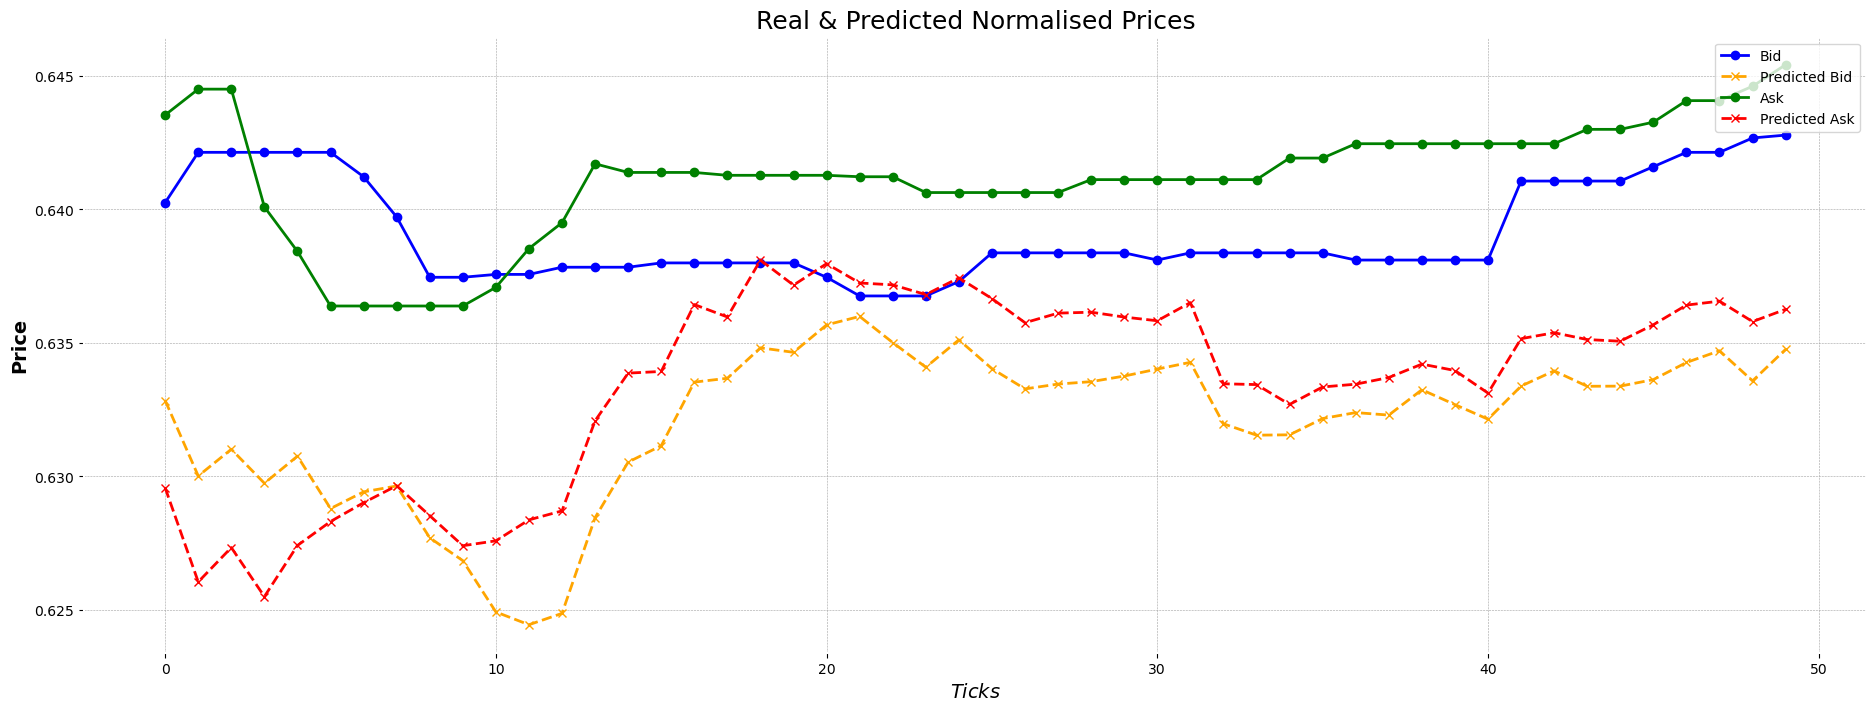

In [68]:
# plot ask and bid prices along with predictions
plt.ion()
fig = plt.figure(figsize=(23,8))
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test[350:400, 0], label='Bid', marker='o', markersize=6, linestyle='-', color='blue')
line2, = ax1.plot(pred[350:400, 0], label='Predicted Bid', marker='x', markersize=6, linestyle='--', color='orange')
line3, = ax1.plot(y_test[350:400, 1], label='Ask', marker='o', markersize=6, linestyle='-', color='green')
line4, = ax1.plot(pred[350:400, 1], label='Predicted Ask', marker='x', markersize=6, linestyle='--', color='red')

plt.title('Real & Predicted Normalised Prices', size=18)
plt.ylabel('Price', size=14)
plt.xlabel('$Ticks$', size=14)
plt.legend(loc='upper right')
plt.show()

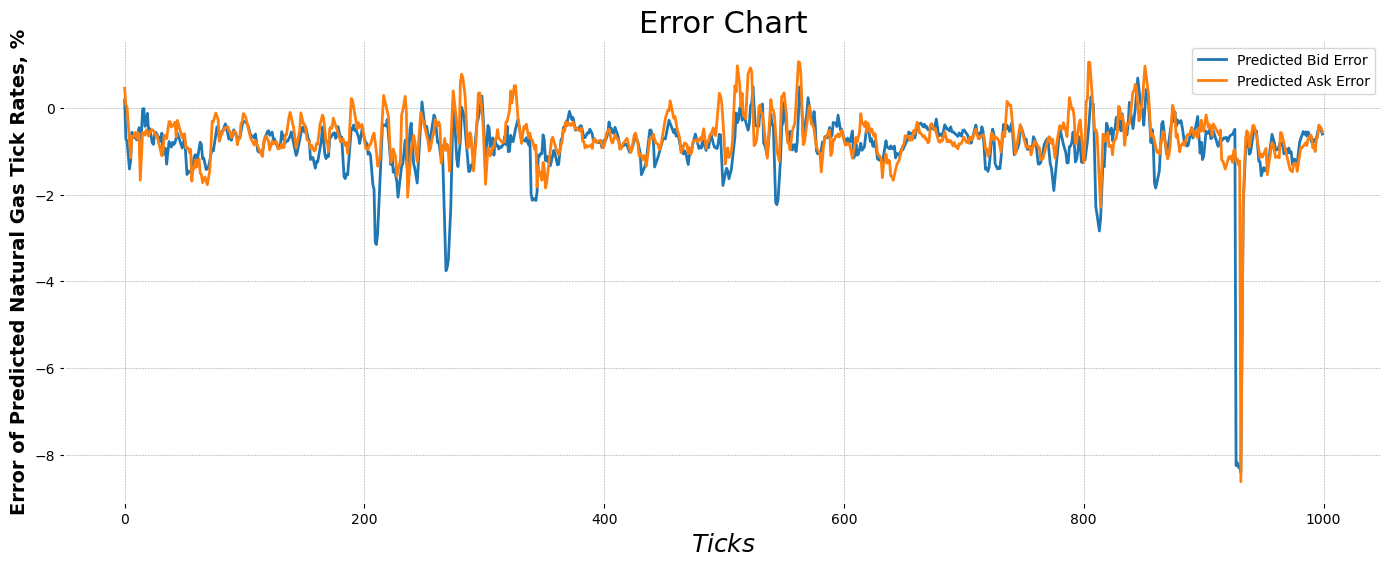

In [69]:
# print the error chart
N1=0     # start
N2=1000   # end

plt.ion()
fig = plt.figure(figsize=(17,6))
ax1 = fig.add_subplot(111)

a = (pred[N1:N2,0]-y_test[N1:N2,0])*100
b = (pred[N1:N2,1]-y_test[N1:N2,1])*100

line1, = ax1.plot(a, label='Predicted Bid Error')
line2, = ax1.plot(b, label='Predicted Ask Error')

plt.title('Error Chart', size=22)
plt.ylabel('Error of Predicted Natural Gas Tick Rates, %', size=14)
plt.xlabel('$Ticks$', size=18)
plt.legend(loc='upper right') 

plt.show()

## MLP Model

In [70]:
# create the multi layer prerception model
from tensorflow.keras import layers, models

input_data = layers.Input(shape=(50, 12))
flattened_input = layers.Flatten()(input_data)
dense1 = layers.Dense(128, activation='relu')(flattened_input)
dense2 = layers.Dense(64, activation='relu')(dense1)
output = layers.Dense(2, activation='sigmoid')(dense2) 
model = models.Model(inputs=input_data, outputs=output)

In [71]:
# compile the model
model.compile(optimizer='adam', loss='mse', metrics=["mae",  tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score()])

In [72]:
# train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2, verbose=1, callbacks=[es,mc])

Epoch 1/20
669/674 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051 - mae: 0.0362 - r2_score: 0.9129 - root_mean_squared_error: 0.0616
Epoch 1: val_loss did not improve from 0.00031
674/674 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0050 - mae: 0.0361 - r2_score: 0.9135 - root_mean_squared_error: 0.0614 - val_loss: 0.0011 - val_mae: 0.0132 - val_r2_score: 0.9858 - val_root_mean_squared_error: 0.0325
Epoch 2/20
670/674 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8529e-04 - mae: 0.0120 - r2_score: 0.9950 - root_mean_squared_error: 0.0169
Epoch 2: val_loss did not improve from 0.00031
674/674 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8502e-04 - mae: 0.0120 - r2_score: 0.9950 - root_mean_squared_error: 0.0169 - val_loss: 9.7263e-04 - val_mae: 0.0155 - val_r2_score: 0.9869 - val_root_mean_squared_error: 0.0312
Epoch 3/20
656/674 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1391e-04 - mae: 0.0104 - r2_score: 0.9963 - root_mean_squared_error: 0.0146
Epoch 3: val_loss did not improve from 0.00031

In [73]:
# load the best model
best_model = keras.models.load_model('best_model.keras')

In [74]:
# evaluate the model
scores = best_model.evaluate(X_test, y_test, verbose=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7428e-05 - mae: 0.0058 - r2_score: 0.7838 - root_mean_squared_error: 0.0075


In [75]:
# print the metrics
print("Mean Absolute Error: %.9f" % scores[0])
print("Mean Absolute Error: %.9f" % scores[1])
print("R2 Score: %.9f " % (scores[2]))
print("root means squared error (rmse): %.9f" % (scores[3]))

Mean Absolute Error: 0.000064122
Mean Absolute Error: 0.006045898
R2 Score: 0.008007628 
root means squared error (rmse): 0.981949747


In [76]:
# generate predicitons
pred = model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [77]:
# store metrics the the dataframe for later use
MLP_METRICS = {
    "mse" : (scores[0]*1),
    "mae" : (scores[1]*1),
    "r2" : (scores[2]*1),
    "rmse" : (scores[3]*1)
}

MLP_METRICS = pd.DataFrame([MLP_METRICS])
MLP_METRICS.index = ['MLP']  
MLP_METRICS.index.name = 'Model_Type'
overall_results = pd.concat([overall_results, MLP_METRICS], ignore_index=False)
overall_results

,mse,mae,r2,rmse
lstm,0.000045,0.004779,0.006744,0.987205
cnn,0.000064,0.006046,0.008008,0.981950
MLP,0.000064,0.006046,0.008008,0.981950


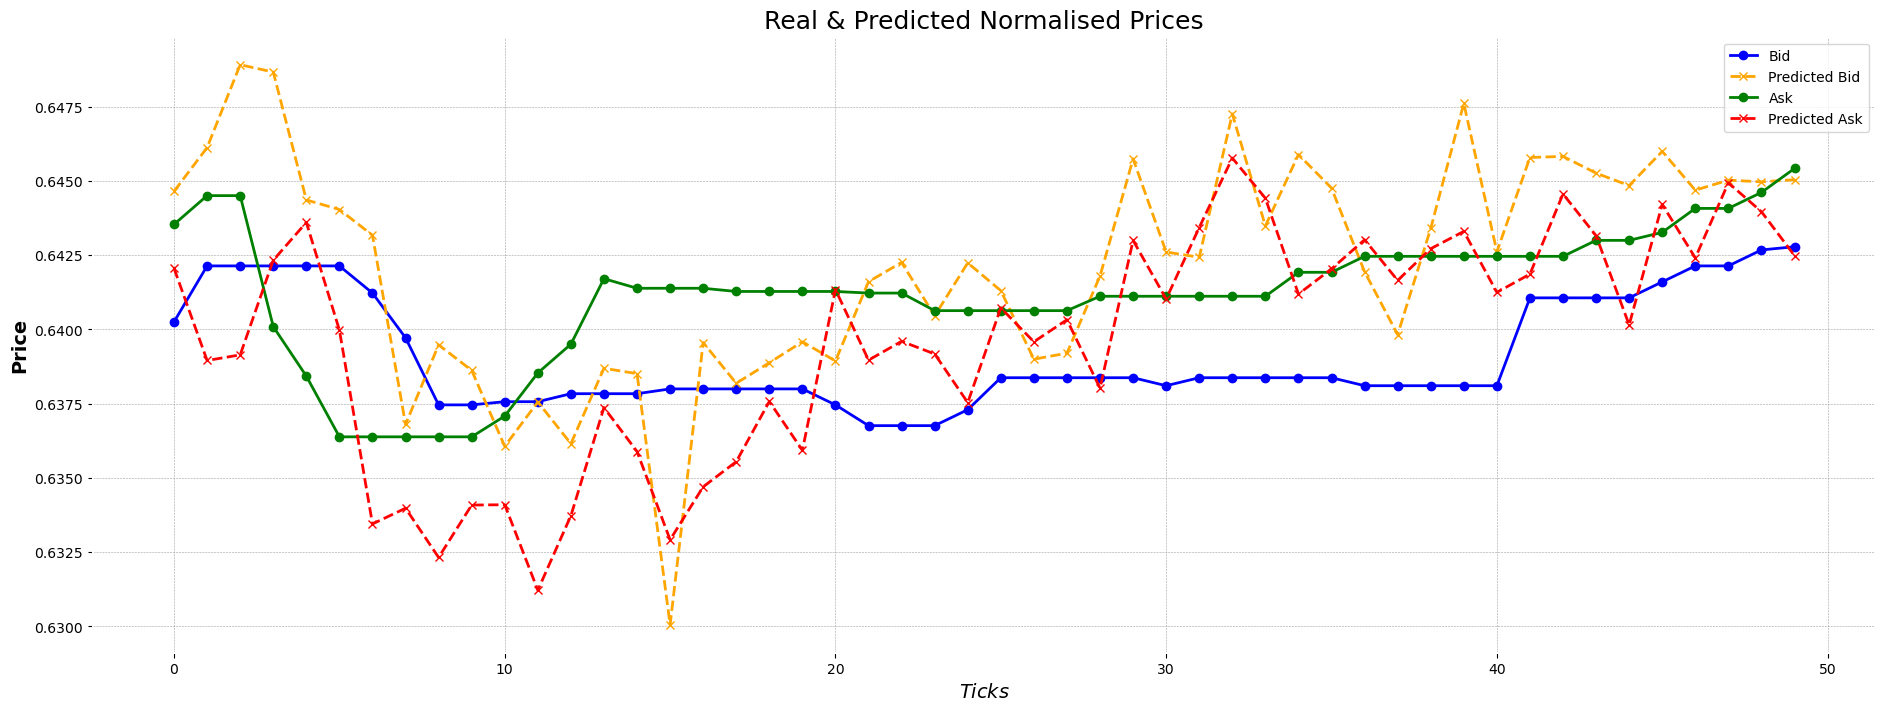

In [78]:
# plot the ask and bid prices with predictions
plt.ion()
fig = plt.figure(figsize=(23,8))
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test[350:400, 0], label='Bid', marker='o', markersize=6, linestyle='-', color='blue')
line2, = ax1.plot(pred[350:400, 0], label='Predicted Bid', marker='x', markersize=6, linestyle='--', color='orange')
line3, = ax1.plot(y_test[350:400, 1], label='Ask', marker='o', markersize=6, linestyle='-', color='green')
line4, = ax1.plot(pred[350:400, 1], label='Predicted Ask', marker='x', markersize=6, linestyle='--', color='red')

plt.title('Real & Predicted Normalised Prices', size=18)
plt.ylabel('Price', size=14)
plt.xlabel('$Ticks$', size=14)
plt.legend(loc='upper right')
plt.show()

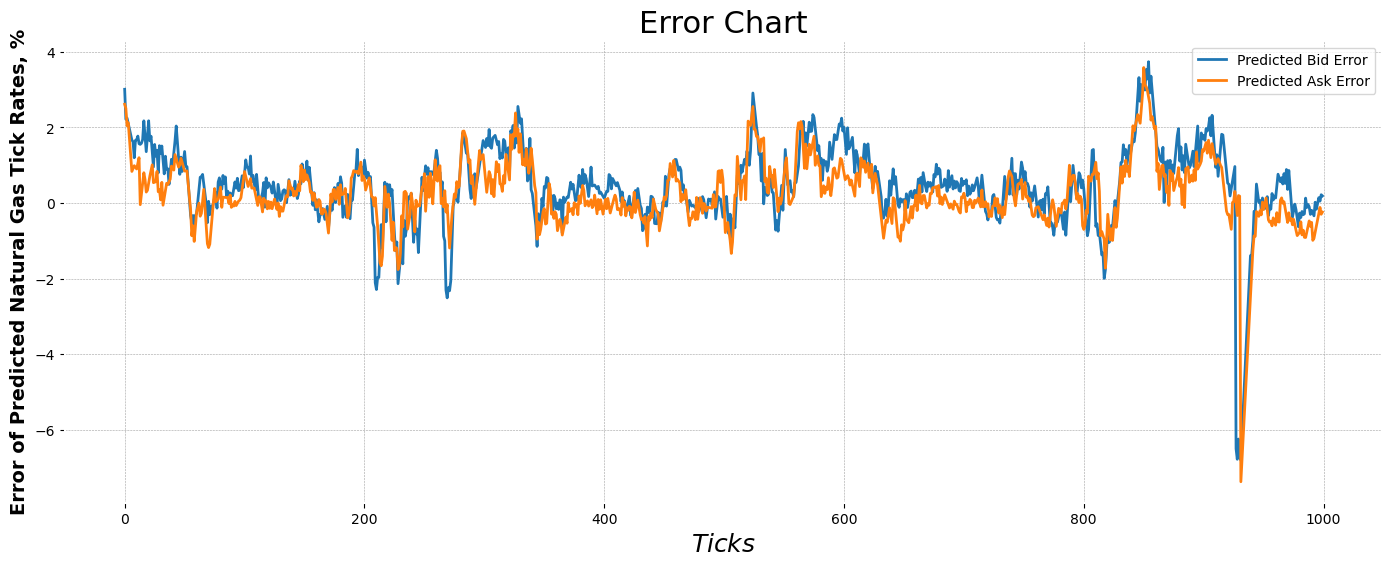

In [79]:
# plot error graph
N1=0     # start
N2=1000   # end

plt.ion()
fig = plt.figure(figsize=(17,6))
ax1 = fig.add_subplot(111)

a = (pred[N1:N2,0]-y_test[N1:N2,0])*100
b = (pred[N1:N2,1]-y_test[N1:N2,1])*100

line1, = ax1.plot(a, label='Predicted Bid Error')
line2, = ax1.plot(b, label='Predicted Ask Error')

plt.title('Error Chart', size=22)
plt.ylabel('Error of Predicted Natural Gas Tick Rates, %', size=14)
plt.xlabel('$Ticks$', size=18)
plt.legend(loc='upper right') 

plt.show()

## Gated Recurrant unit

In [80]:
# create GRU model
model = keras.Sequential()
model.add(layers.GRU(64, input_shape=(50,12), return_sequences=False))
model.add(layers.Dense(2))

C:\Users\fredd\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [81]:
# compile the model
model.compile(optimizer='adam', loss='mse', metrics=["mae",  tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score()])

In [82]:
# train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2, verbose=1, callbacks=[es,mc])

Epoch 1/20
673/674 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0024 - mae: 0.0193 - r2_score: 0.9557 - root_mean_squared_error: 0.0405
Epoch 1: val_loss did not improve from 0.00031
674/674 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - loss: 0.0024 - mae: 0.0193 - r2_score: 0.9558 - root_mean_squared_error: 0.0405 - val_loss: 3.4699e-04 - val_mae: 0.0043 - val_r2_score: 0.9954 - val_root_mean_squared_error: 0.0186
Epoch 2/20
673/674 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.7386e-05 - mae: 0.0048 - r2_score: 0.9990 - root_mean_squared_error: 0.0076
Epoch 2: val_loss did not improve from 0.00031
674/674 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - loss: 5.7388e-05 - mae: 0.0048 - r2_score: 0.9990 - root_mean_squared_error: 0.0076 - val_loss: 3.2797e-04 - val_mae: 0.0040 - val_r2_score: 0.9956 - val_root_mean_squared_error: 0.0181
Epoch 3/20
674/674 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.2446e-05 - mae: 0.0046 - r2_score: 0.9991 - root_mean_squared_error: 0.0072
Epoch 3: val_loss did not improve f

In [83]:
# load the best model
best_model = keras.models.load_model('best_model.keras')

In [84]:
# evaluate the model
scores = best_model.evaluate(X_test, y_test, verbose=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7428e-05 - mae: 0.0058 - r2_score: 0.7838 - root_mean_squared_error: 0.0075


In [85]:
# print the metrics
print("Mean Absolute Error: %.9f" % scores[0])
print("Mean Absolute Error: %.9f" % scores[1])
print("R2 Score: %.9f " % (scores[2]))
print("root means squared error (rmse): %.9f" % (scores[3]))

Mean Absolute Error: 0.000064122
Mean Absolute Error: 0.006045898
R2 Score: 0.008007628 
root means squared error (rmse): 0.981949747


In [86]:
# generate predicitons
pred = model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [87]:
# store the metrics in the dataframe for later use
GRU_METRICS = {
    "mse" : (scores[0]*1),
    "mae" : (scores[1]*1),
    "r2" : (scores[2]*1),
    "rmse" : (scores[3]*1)
}

GRU_METRICS = pd.DataFrame([GRU_METRICS])
GRU_METRICS.index = ['GRU']  
GRU_METRICS.index.name = 'Model_Type'
overall_results = pd.concat([overall_results, GRU_METRICS], ignore_index=False)
overall_results

,mse,mae,r2,rmse
lstm,0.000045,0.004779,0.006744,0.987205
cnn,0.000064,0.006046,0.008008,0.981950
MLP,0.000064,0.006046,0.008008,0.981950
GRU,0.000064,0.006046,0.008008,0.981950


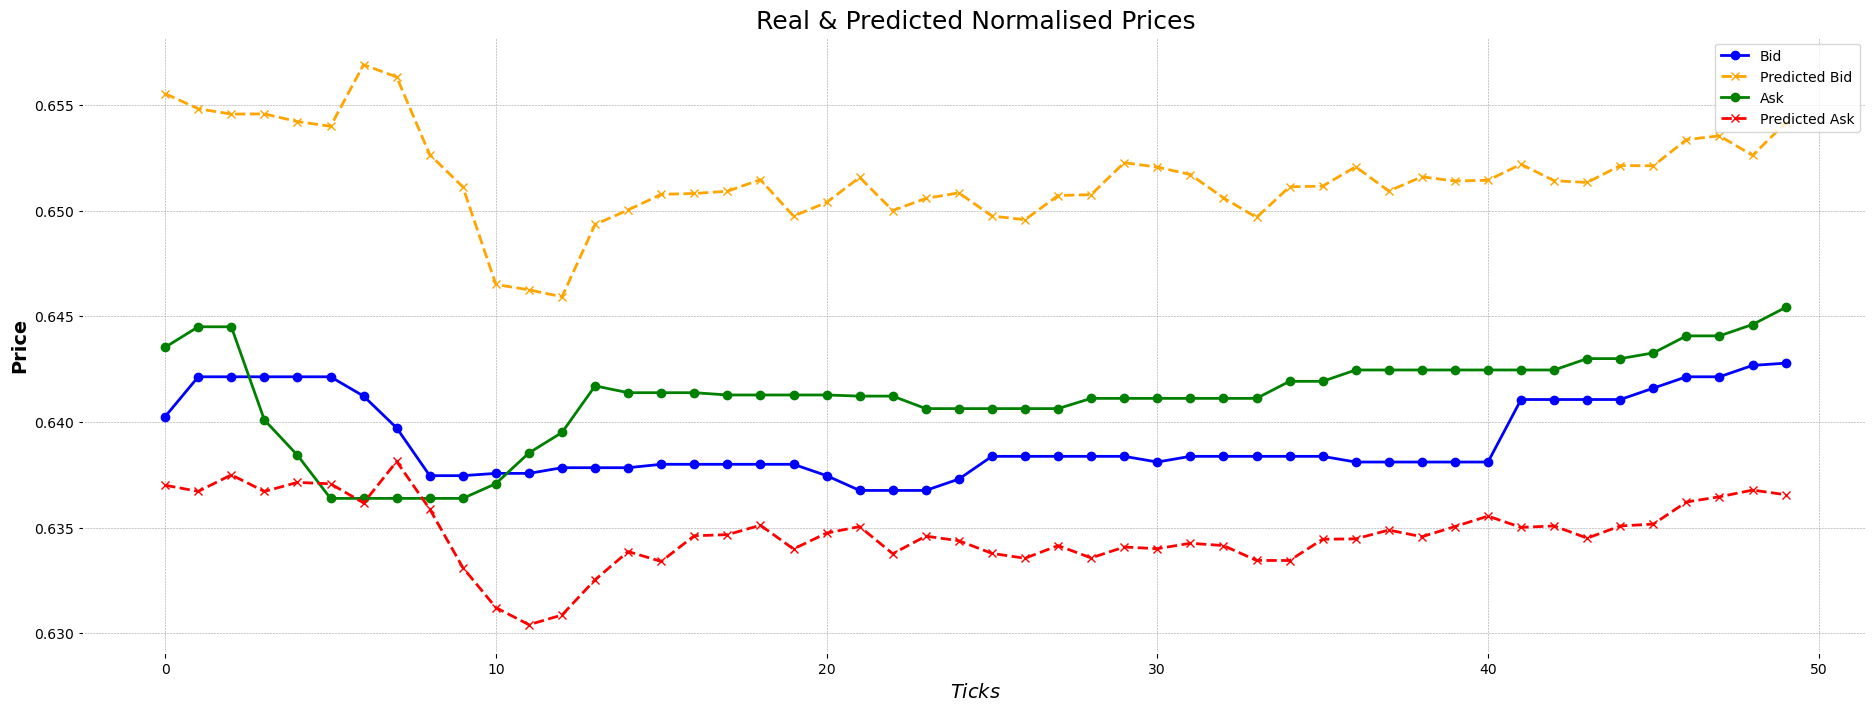

In [88]:
# plot the ask and bid prices along with predictions
plt.ion()
fig = plt.figure(figsize=(23,8))
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test[350:400, 0], label='Bid', marker='o', markersize=6, linestyle='-', color='blue')
line2, = ax1.plot(pred[350:400, 0], label='Predicted Bid', marker='x', markersize=6, linestyle='--', color='orange')
line3, = ax1.plot(y_test[350:400, 1], label='Ask', marker='o', markersize=6, linestyle='-', color='green')
line4, = ax1.plot(pred[350:400, 1], label='Predicted Ask', marker='x', markersize=6, linestyle='--', color='red')

plt.title('Real & Predicted Normalised Prices', size=18)
plt.ylabel('Price', size=14)
plt.xlabel('$Ticks$', size=14)
plt.legend(loc='upper right')
plt.show()

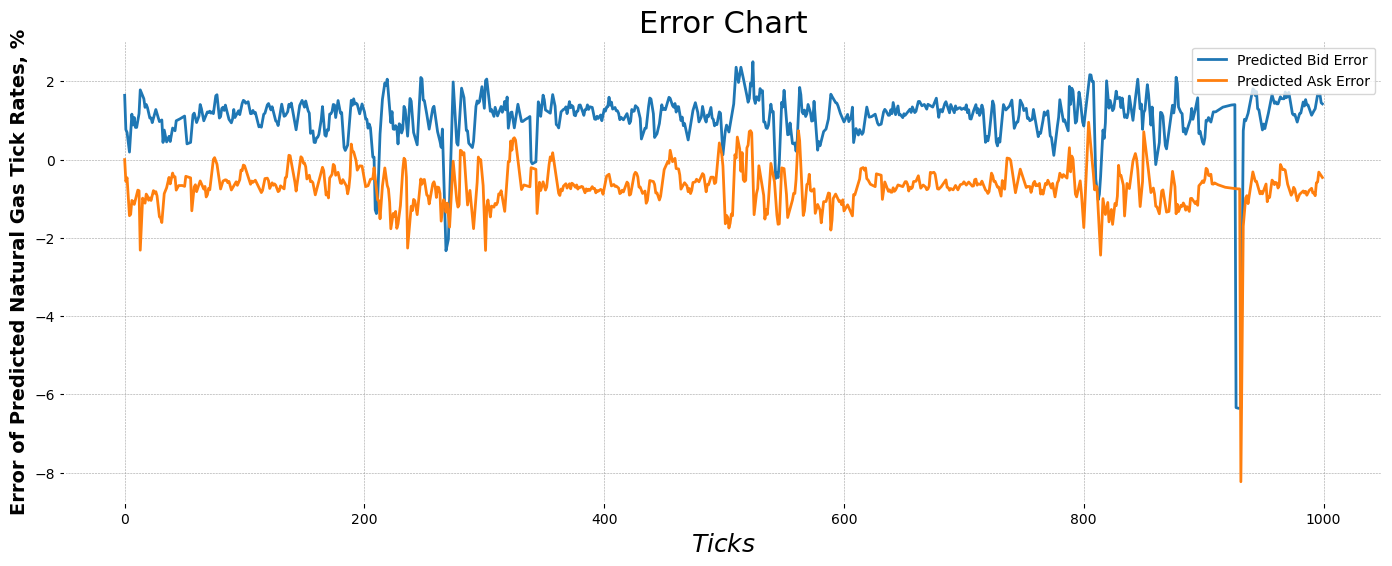

In [89]:
# plot the error graph
N1=0
N2=1000

plt.ion()
fig = plt.figure(figsize=(17,6))
ax1 = fig.add_subplot(111)

a = (pred[N1:N2,0]-y_test[N1:N2,0])*100
b = (pred[N1:N2,1]-y_test[N1:N2,1])*100

line1, = ax1.plot(a, label='Predicted Bid Error')
line2, = ax1.plot(b, label='Predicted Ask Error')

plt.title('Error Chart', size=22)
plt.ylabel('Error of Predicted Natural Gas Tick Rates, %', size=14)
plt.xlabel('$Ticks$', size=18)
plt.legend(loc='upper right') 

plt.show()

### Normalize the metrics in overall results so they are visible on the histogram

In [90]:
# scale the metrics to make them visible on the histogram
overall_results['r2'] *= 100
overall_results['mse'] *= 10000
overall_results['mae'] *= 100

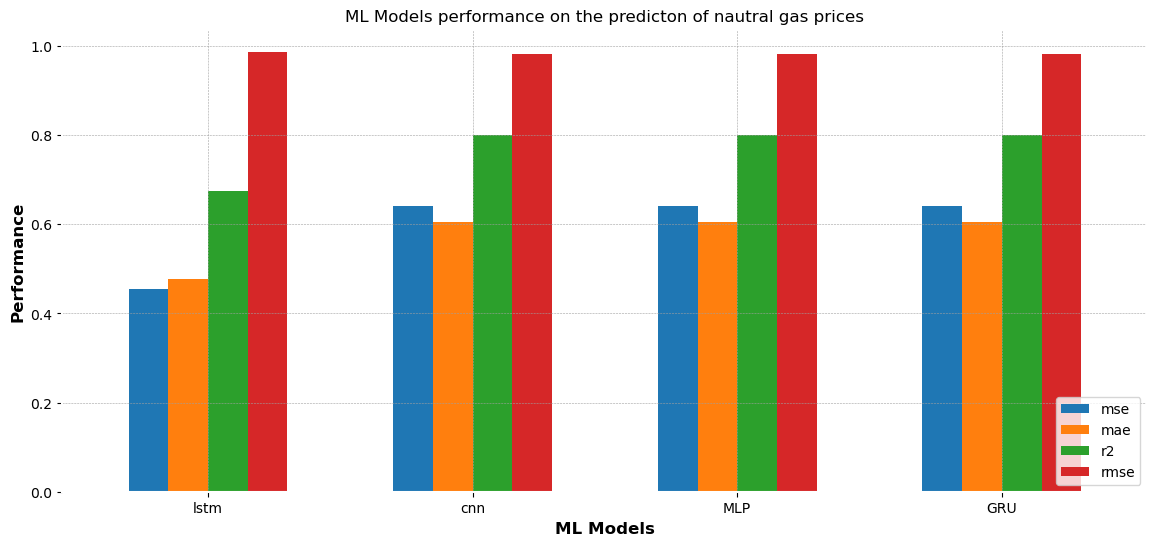

In [91]:
# plot the histogram to compare the metrics for each model 
overall_results.plot(kind='bar', figsize=(14,6), width=0.6)
plt.title('ML Models performance on the predicton of nautral gas prices')
plt.ylabel('Performance')
plt.xlabel('ML Models')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()